In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, MobileNet, VGG19
from tensorflow.keras.layers import Dense, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)  
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/solar-panels/Solar_Pan/train',
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
    classes=['Black Core', 'Crack', 'Finger Interruption', 'Free Defect', 'Thick Line']
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/solar-panels/Solar_Pan/val',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',  
    shuffle=False 
)

train_counts = train_generator.samples
test_counts = test_generator.samples

images_per_class_train = train_counts // len(train_generator.class_indices)
images_per_class_test = test_counts // len(test_generator.class_indices)

summary_df = pd.DataFrame({
    'Defect Name': train_generator.class_indices.keys(),
    'Training Images': [images_per_class_train] * len(train_generator.class_indices),
    'Testing Images': [images_per_class_test] * len(test_generator.class_indices)
})

print("\n")
print(summary_df)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


           Defect Name  Training Images  Testing Images
0           Black Core              400             100
1                Crack              400             100
2  Finger Interruption              400             100
3          Free Defect              400             100
4           Thick Line              400             100


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot accuracy vs epochs
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss vs epochs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Training InceptionV3...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 491ms/step - accuracy: 0.4369 - loss: 2.2116 - val_accuracy: 0.6500 - val_loss: 0.8219
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.6082 - loss: 0.9149 - val_accuracy: 0.7360 - val_loss: 0.6953
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.6732 - loss: 0.8405 - val_accuracy: 0.7220 - val_loss: 0.6782
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.6757 - loss: 0.7859 - val_accuracy: 0.6900 - val_loss: 0.7340
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.6891 - loss: 0.7645 - val_accuracy: 0.7720 - val_loss: 0.6198
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.7083 - loss: 0.7522 - val_accuracy: 0.7760 - val_loss: 0.5684
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.7302 - loss: 0.6799 - val_accuracy: 0.7680 - val_loss: 0.6329
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.7211 -

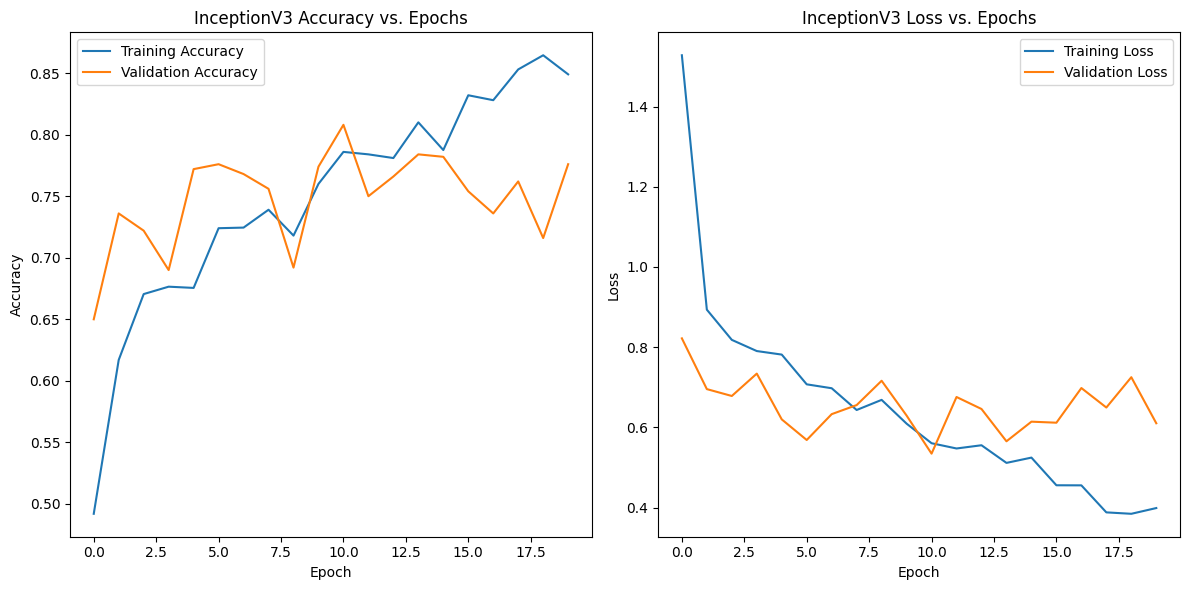

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.8568 - loss: 0.3752
InceptionV3 Test Accuracy: 0.7760
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 559ms/step
Normalized confusion matrix


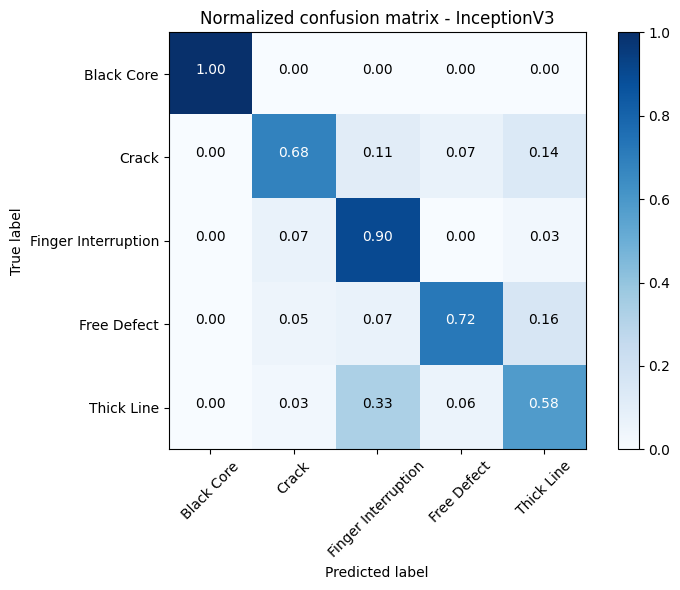

InceptionV3 Classification Report:
                     precision    recall  f1-score   support

         Black Core       1.00      1.00      1.00       100
              Crack       0.82      0.68      0.74       100
Finger Interruption       0.64      0.90      0.75       100
        Free Defect       0.85      0.72      0.78       100
         Thick Line       0.64      0.58      0.61       100

           accuracy                           0.78       500
          macro avg       0.79      0.78      0.78       500
       weighted avg       0.79      0.78      0.78       500

Training MobileNet...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 289ms/step - accuracy: 0.4688 - loss: 1.4440 - val_accuracy: 0.7540 - val_loss: 0.6156
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - accuracy: 0.6586 - loss: 0.8329 - val_accuracy: 0.7160 - val_loss: 0.7128
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.6894 - loss: 0.7740 - val_accuracy: 0.8260 - val_loss: 0.5540
Epoc

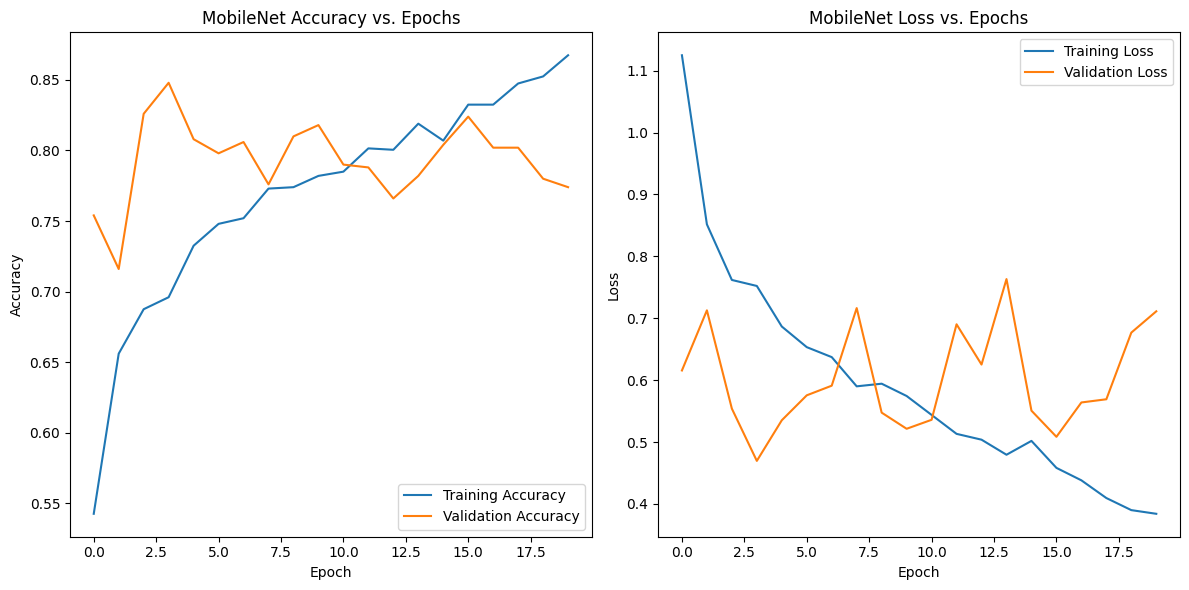

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.9081 - loss: 0.2804
MobileNet Test Accuracy: 0.7740
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step
Normalized confusion matrix


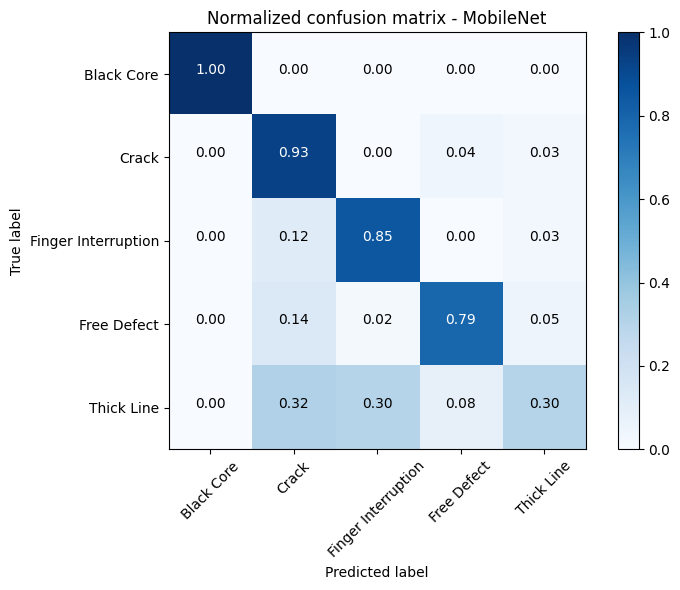

MobileNet Classification Report:
                     precision    recall  f1-score   support

         Black Core       1.00      1.00      1.00       100
              Crack       0.62      0.93      0.74       100
Finger Interruption       0.73      0.85      0.78       100
        Free Defect       0.87      0.79      0.83       100
         Thick Line       0.73      0.30      0.43       100

           accuracy                           0.77       500
          macro avg       0.79      0.77      0.76       500
       weighted avg       0.79      0.77      0.76       500

Training VGG19...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.4489 - loss: 1.2113 - val_accuracy: 0.4340 - val_loss: 1.0123
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.5552 - loss: 0.9822 - val_accuracy: 0.5020 - val_loss: 1.0028
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 242ms/step - accuracy: 0.5779 - loss: 0.9710 - val_accuracy: 0.3940 - val_loss: 1.2146
Epoch 4/20

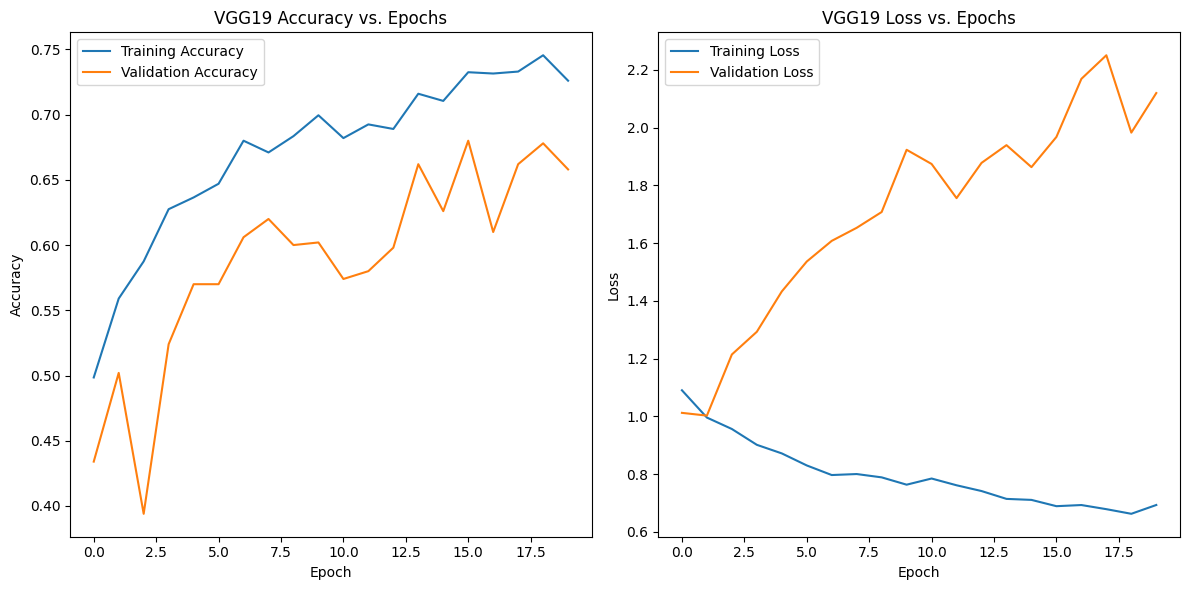

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy: 0.8126 - loss: 0.6091
VGG19 Test Accuracy: 0.6580
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step
Normalized confusion matrix


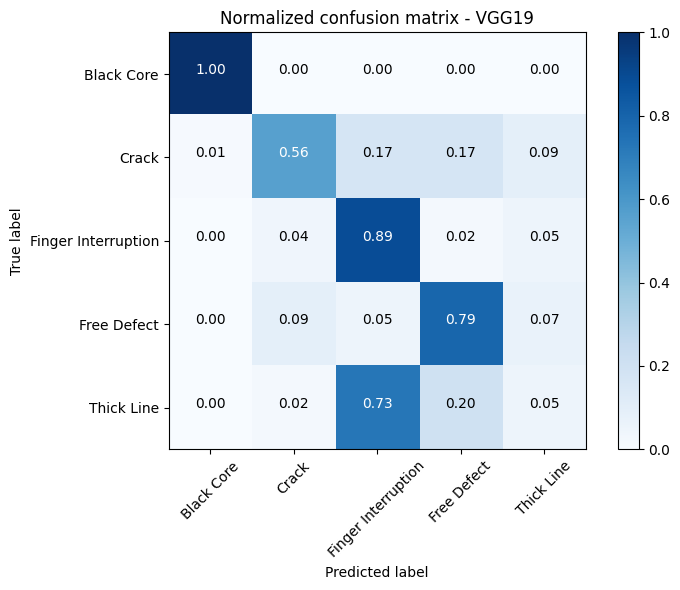

VGG19 Classification Report:
                     precision    recall  f1-score   support

         Black Core       0.99      1.00      1.00       100
              Crack       0.79      0.56      0.65       100
Finger Interruption       0.48      0.89      0.63       100
        Free Defect       0.67      0.79      0.72       100
         Thick Line       0.19      0.05      0.08       100

           accuracy                           0.66       500
          macro avg       0.62      0.66      0.62       500
       weighted avg       0.62      0.66      0.62       500



In [9]:
# Function to create models using different pre-trained architectures
def create_model(model_name, input_shape=(224, 224, 3)):
    if model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNet':
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'VGG19':
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError(f"Unsupported pre-trained model: {model_name}")

    # Freeze pre-trained layers for transfer learning
    base_model.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)  # Adjust hidden layer size as needed
    predictions = Dense(5, activation='softmax')(x)  # Output layer for 5 classes

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Create models for each pre-trained architecture
models = {
    'InceptionV3': create_model('InceptionV3'),
    'MobileNet': create_model('MobileNet'),
    'VGG19': create_model('VGG19')
}

# Compile and train each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=test_generator
    )

    # Plot accuracy and loss vs epochs
    plot_metrics(history, model_name)

    # Evaluating model performance
    loss, accuracy = model.evaluate(test_generator)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

    # Generate predictions
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    true_classes = test_generator.classes

    # Generate confusion matrix
    confusion_mtx = confusion_matrix(true_classes, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(confusion_mtx, classes=['Black Core', 'Crack', 'Finger Interruption', 'Free Defect', 'Thick Line'], normalize=True,
                          title=f'Normalized confusion matrix - {model_name}')
    plt.show()

    # Generate classification report
    class_labels = list(test_generator.class_indices.keys())
    report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
    print(f"{model_name} Classification Report:\n{report}")

In [10]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracies = []
f1_scores = []
recalls = []
precisions = []

for model_name, model in models.items():
    y_pred = model.predict(test_generator)
    y_true = test_generator.classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    accuracies.append(accuracy)

    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    f1_scores.append(f1)

    recall = recall_score(y_true, y_pred_classes, average='weighted')
    recalls.append(recall)

    precision = precision_score(y_true, y_pred_classes, average='weighted')
    precisions.append(precision)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("\n")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step
InceptionV3 Metrics:
Accuracy: 0.7760
F1 Score: 0.7752
Recall: 0.7760
Precision: 0.7884


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step
MobileNet Metrics:
Accuracy: 0.7740
F1 Score: 0.7554
Recall: 0.7740
Precision: 0.7884


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step
VGG19 Metrics:
Accuracy: 0.6580
F1 Score: 0.6162
Recall: 0.6580
Precision: 0.6249




In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 23.5 MB/s eta 0:00:00


In [3]:
import os
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")
results = model.train(data = "/kaggle/input/solar-panels/Solar_Pan", epochs = 20, imgsz = 64)

100%|██████████| 5.30M/5.30M [00:00<00:00, 146MB/s]

Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/solar-panels/Solar_Pan, epochs=20, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

2024-03-22 11:34:50,144	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-22 11:34:50,950	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 165MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/solar-panels/Solar_Pan/train... 2000 images, 0 corrupt: 100%|██████████| 2000/2000 [00:03<00:00, 563.92it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/solar-panels/Solar_Pan is not writeable, cache not saved.



val: Scanning /kaggle/input/solar-panels/Solar_Pan/val... 500 images, 0 corrupt: 100%|██████████| 500/500 [00:01<00:00, 490.34it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/solar-panels/Solar_Pan is not writeable, cache not saved.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.153G      1.745         16         64:   8%|▊         | 10/125 [00:02<00:14,  7.78it/s]

       1/20     0.153G       1.76         16         64:  11%|█         | 14/125 [00:02<00:18,  5.93it/s]
100%|██████████| 755k/755k [00:00<00:00, 31.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]

                   all      0.454          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all      0.496          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]

                   all       0.57          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all      0.488          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.29it/s]

                   all      0.624          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]

                   all      0.574          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]

                   all      0.632          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all      0.524          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]

                   all      0.626          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.157G     0.9799         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.20it/s]

                   all      0.606          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.157G     0.9884         16         64: 100%|██████████| 125/125 [00:22<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]

                   all      0.634          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.157G     0.9628         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.90it/s]

                   all       0.62          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.157G     0.9678         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.17it/s]

                   all      0.644          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.157G     0.9552         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all       0.58          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.157G     0.9247         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]

                   all      0.592          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.157G     0.9572         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  5.21it/s]

                   all      0.598          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.157G      0.929         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.40it/s]

                   all      0.608          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.157G     0.9576         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]

                   all      0.638          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.157G     0.9353         16         64: 100%|██████████| 125/125 [00:21<00:00,  5.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]

                   all      0.644          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.157G     0.9293         16         64: 100%|██████████| 125/125 [00:20<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all      0.652          1



20 epochs completed in 0.140 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/solar-panels/Solar_Pan/train... found 2000 images in 5 classes ✅ 
val: /kaggle/input/solar-panels/Solar_Pan/val... found 500 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]


                   all       0.65          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/accuracy_top1,▁▂▅▂▇▅▇▃▇▆▇▇█▅▆▆▆███
metrics/accuracy_top5,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▄▃▃▃▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁
val/loss,█▆▅▇▅▄▃▅▂▂▂▂▂▃▂▂▂▁▁▁
lr/pg0,8e-05


In [ ]:
from tensorflow.keras.preprocessing import image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255. 
    return img_array

test_image_path = '/kaggle/input/solar-panels/Val/Finger/img001862.jpg'

preprocessed_image = preprocess_image(test_image_path)

class_labels = ['Black Core', 'Crack', 'Finger Interruption', 'Free Defect', 'Thick Line']

for model_name, model in models.items():
    predictions = model.predict(preprocessed_image)
    predicted_class = class_labels[np.argmax(predictions)]
    print(f"Predicted class for {model_name}: {predicted_class}")